### 1. Cogan SF, Ludwig KA, Welle CG, Takmakov P. Tissue damage thresholds during therapeutic electrical stimulation. J Neural Eng. 2016;13(2):21001. doi:10.1088/1741-2560/13/2/021001.

### shannon equation
###  log(D) = k - log(Q) 
### k = 1.85 
### charge density = D, charge per phase = Q 

### we are in the macro region according to the article (> 30 micron diamater) 

### radius = 2.3 mm, so 0.23 cm - for strips

### depths 

Andrew says our spencer depths are 

1.12 mm diameter, 2.41 mm length 

### microwire

### macro/micro 
macro - 1.28 mm diameter, 1.57 length 

micro - 0.04 mm

### micro ECoG - 2009 U Pitt Wei Wang paper
diameter = 1.5 mm

### consider currents 1000-3000 uA 

### consider time per phase 100-1000 uS 

### tissue damage threshold of  30 $\mu C/cm^{2}$

In [8]:
%qtconsole

In [1]:
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd


#import seaborn as sns; sns.set()

from bokeh.charts import BoxPlot, show
from bokeh.io import push_notebook,show,output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure 
output_notebook()


Loading BokehJS ...

In [2]:
# set up current ranges, pulse width ranges

pulse_width = np.arange(.1e-3,1.1e-3,0.00001)
log_pulse_width = np.log10(1e6*pulse_width)

current = np.arange(100,3000,10)
log_current = np.log10(current)

# make meshGrid of values to evaluate 
meshed_grid_x, meshed_grid_y = np.meshgrid(pulse_width,current)

meshed_grid_x

#meshed_grid_y

array([[ 0.0001 ,  0.00011,  0.00012, ...,  0.00107,  0.00108,  0.00109],
       [ 0.0001 ,  0.00011,  0.00012, ...,  0.00107,  0.00108,  0.00109],
       [ 0.0001 ,  0.00011,  0.00012, ...,  0.00107,  0.00108,  0.00109],
       ..., 
       [ 0.0001 ,  0.00011,  0.00012, ...,  0.00107,  0.00108,  0.00109],
       [ 0.0001 ,  0.00011,  0.00012, ...,  0.00107,  0.00108,  0.00109],
       [ 0.0001 ,  0.00011,  0.00012, ...,  0.00107,  0.00108,  0.00109]])

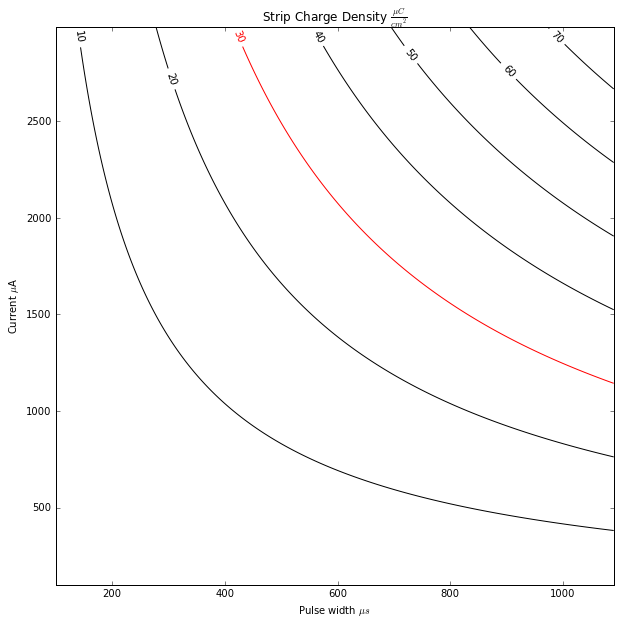

In [4]:
### strips
strip_r = 0.23/2
strip_area = np.pi*(strip_r**2)


charge_per_phase= meshed_grid_x*meshed_grid_y

log_charge_per_phase = np.log10(charge_per_phase)

# look at charge/cm^2

# charge density

charge_density = charge_per_phase/strip_area

log_charge_density = np.log10(charge_density)

#pal = sns.light_palette("navy", as_cmap=True)
a = plt.figure()
a.set_size_inches(10,10)
levels = np.arange(10,110,10)
h = plt.contour(1e6*pulse_width,current,charge_density,levels=levels,colors=('k','k','r','k','k','k','k','k','k','k'))
#cbar = plt.colorbar()
plt.title(r'Strip Charge Density $\frac{\mu C}{cm^2}$')
plt.xlabel('Pulse width $\mu s$')
plt.ylabel('Current $\mu$A')
#cbar.set_label(r'charge density $\frac{\mu C}{cm^2}$')

plt.clabel(h, inline=1,inline_spacing=5,fontsize=10,fmt='%1i')

plt.show()
#a = plt.gcf()
#a.set_size_inches(10,10)
#a.savefig('strip.png', dpi=600)


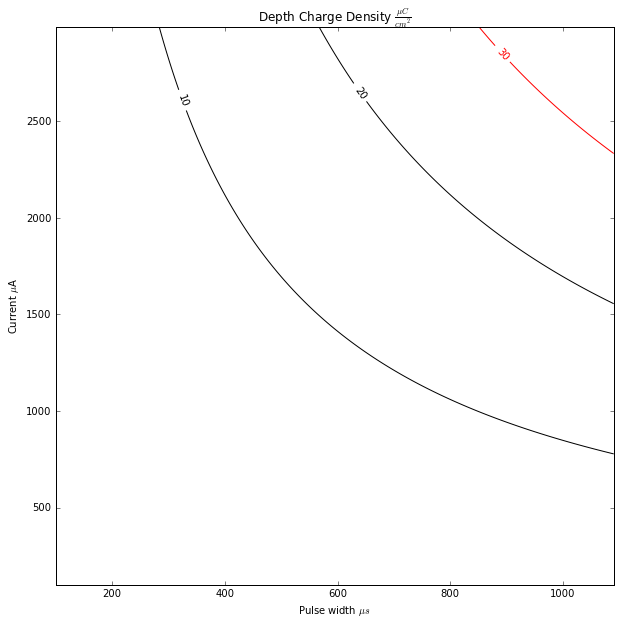

In [14]:
### depths  # distances in cm 
depth_r = 0.112/2
depth_h = 0.241
depth_area = 2*np.pi*depth_r*depth_h


charge_per_phase= meshed_grid_x*meshed_grid_y

log_charge_per_phase = np.log10(charge_per_phase)

# look at charge/cm^2

# charge density

charge_density = charge_per_phase/depth_area

log_charge_density = np.log10(charge_density)

#pal = sns.light_palette("navy", as_cmap=True)
a = plt.figure()
a.set_size_inches(10,10)
levels = np.arange(10,110,10)
h = plt.contour(1e6*pulse_width,current,charge_density,levels=levels,colors=('k','k','r','k','k','k','k','k','k','k'))
#cbar = plt.colorbar()
plt.title(r'Depth Charge Density $\frac{\mu C}{cm^2}$')
plt.xlabel('Pulse width $\mu s$')
plt.ylabel('Current $\mu$A')
#cbar.set_label(r'charge density $\frac{\mu C}{cm^2}$')

plt.clabel(h, inline=1,inline_spacing=5,fontsize=10,fmt='%1i')

plt.show()
#a = plt.gcf()
#a.set_size_inches(10,10)
#a.savefig('depth_241_len.png', dpi=600)


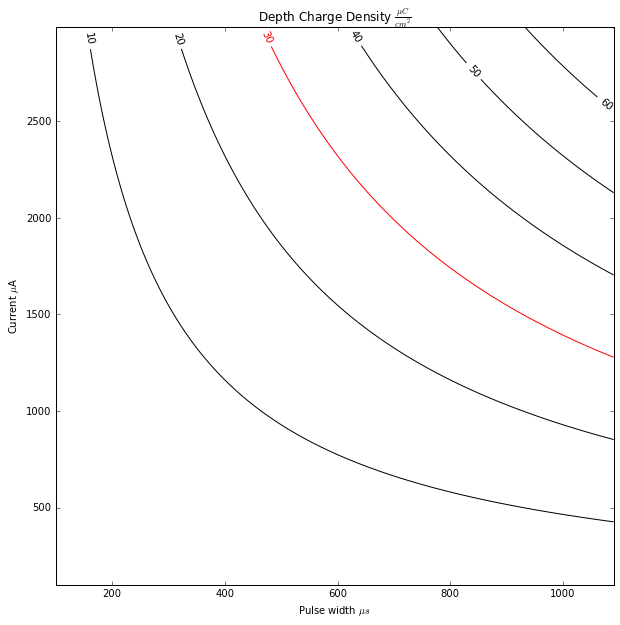

In [12]:
### depths  # distances in cm 
depth_r = 0.112/2
depth_h = 0.132
depth_area_small = 2*np.pi*depth_r*depth_h


charge_per_phase= meshed_grid_x*meshed_grid_y

log_charge_per_phase = np.log10(charge_per_phase)

# look at charge/cm^2

# charge density

charge_density = charge_per_phase/depth_area_small

log_charge_density = np.log10(charge_density)

#pal = sns.light_palette("navy", as_cmap=True)
a = plt.figure()
a.set_size_inches(10,10)
levels = np.arange(10,110,10)
h = plt.contour(1e6*pulse_width,current,charge_density,levels=levels,colors=('k','k','r','k','k','k','k','k','k','k'))
#cbar = plt.colorbar()
plt.title(r'Depth Charge Density $\frac{\mu C}{cm^2}$')
plt.xlabel('Pulse width $\mu s$')
plt.ylabel('Current $\mu$A')
#cbar.set_label(r'charge density $\frac{\mu C}{cm^2}$')

plt.clabel(h, inline=1,inline_spacing=5,fontsize=10,fmt='%1i')

plt.show()
#a = plt.gcf()
#a.set_size_inches(10,10)
#a.savefig('depth.png', dpi=600)


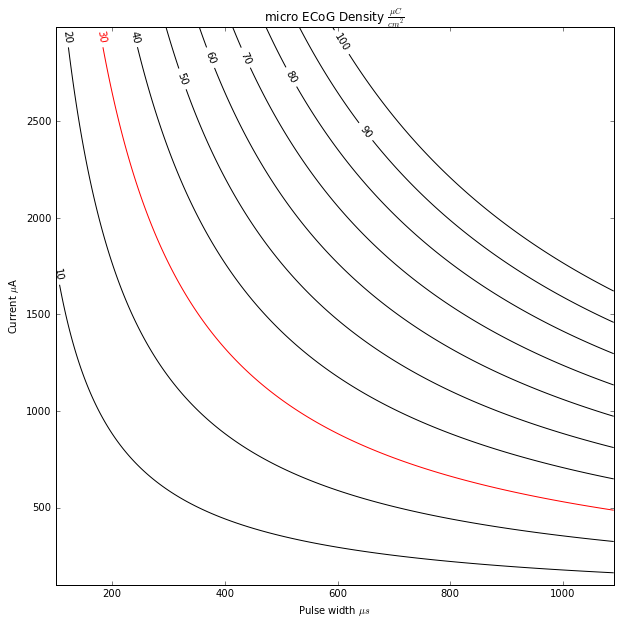

In [7]:
### micro ecog
strip_r = 0.15/2
strip_area = np.pi*(strip_r**2)


charge_per_phase= meshed_grid_x*meshed_grid_y

log_charge_per_phase = np.log10(charge_per_phase)

# look at charge/cm^2

# charge density

charge_density = charge_per_phase/strip_area

log_charge_density = np.log10(charge_density)

#pal = sns.light_palette("navy", as_cmap=True)
a = plt.figure()
a.set_size_inches(10,10)
levels = np.arange(10,110,10)
h = plt.contour(1e6*pulse_width,current,charge_density,levels=levels,colors=('k','k','r','k','k','k','k','k','k','k'))
#cbar = plt.colorbar()
plt.title(r'micro ECoG Density $\frac{\mu C}{cm^2}$')
plt.xlabel('Pulse width $\mu s$')
plt.ylabel('Current $\mu$A')
#cbar.set_label(r'charge density $\frac{\mu C}{cm^2}$')

plt.clabel(h, inline=1,inline_spacing=5,fontsize=10,fmt='%1i')

plt.show()
#a = plt.gcf()
#a.set_size_inches(10,10)
#a.savefig('micro_ecog.png', dpi=600)